# Time Series Analysis

Time series analysis is the statistical analysis of data that is collected at regular intervals over time. It is used to understand the patterns in the data, forecast future values, and identify outliers.

### Benefits of time series analysis
- It can help to identify patterns and trends in data that would not be visible otherwise.
- It can be used to forecast future values of the data, which can be used to make better decisions.
- It can help to identify outliers and anomalies, which can be investigated further.


### Where is time series analysis used?
- In `Finance`, to forecast stock prices, currency exchange rates, and other financial market data.
- In `Retail`, to forecast sales, demand, and inventory levels.

The dataset used in this project is the Superstore sales data, which is available in the `dataset` folder. The data contains the sales data of a Superstore from 2014 to 2017. The data is divided into four categories: `Furniture`, `Office Supplies`, `Technology`, and `Others`. The data also contains the sales data of each category in different regions of the United States. <br />
The original data is available [HERE](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls).

#### There are several categories in the Superstore sales data, we start from time series analysis and forecasting for furniture sales.

### Import all necessary Libraries

In [49]:
# Ignore warning related to pandas_profiling
import warnings

# advanced tools for creating and working with iterators
import itertools

# Fundamental package for linear algebra and multidimensional arrays
import numpy as np

# Python package for data manipulation and analysis
import pandas as pd

# Library for Visualization
import matplotlib

# Plotting library with Matplotlib for Python
import matplotlib.pyplot as plt

# Python module that provides classes and functions for the estimation of many different statistical models
import statsmodels.api as sm

# For visualization of graphs
from pylab import rcParams

# Use FiveThirtyEight style plots
plt.style.use("fivethirtyeight")
# Suppress all warnings
warnings.filterwarnings("ignore")

# Format the size of x and y axis tick labels
matplotlib.rcParams["axes.labelsize"] = 14
# Format the size of the x axis tick labels
matplotlib.rcParams["xtick.labelsize"] = 12
# Format the size of the y axis tick labels
matplotlib.rcParams["ytick.labelsize"] = 12
# Change the color of the text to black
matplotlib.rcParams["text.color"] = "k"

#### Let's read our dataset

In [50]:
# Let's read our data and store it in a dataframe called df
df = pd.read_excel("../Time_Series_Analysis/dataset/Sample - Superstore.xls")

In [51]:
# Let's see what's inside our data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [52]:
# Let's see hom many entries we have for each category
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

As we can see, category `Office Supplies` has maximum sales. So, let's use this category for our further analysis. We'll create a separate dataset for `Office Supplies` and analyze it.

In [53]:
# Create a DataFrame called office_supply containing the "Office Supplies" category
office_supply = df.loc[df["Category"] == "Office Supplies"]

# Print the first 5 rows of office_supply
office_supply.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


In [54]:
# Let's check starting and ending date of office supply orders in our data
office_supply["Order Date"].min(), office_supply["Order Date"].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

So we have our `Office supply` orders from 2014 to 2017. Let's dive into it and analyze it.

#### Cleaning and Preparing Data

In [55]:
# Let's see if we have any missing values in our office supply data
office_supply.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

So we don't have any null values in our dataset. Let's check for duplicate values.

In [56]:
# Check for duplicate data
office_supply.duplicated().sum()

0

So we don't have duplicate values as well. 

As we only want `Order Date` and `Sales` for our analysis. Let's drop other columns. 

In [57]:
# Drop unnecessary columns
columns_to_remove = [
    "Row ID",
    "Order ID",
    "Ship Date",
    "Ship Mode",
    "Customer ID",
    "Customer Name",
    "Segment",
    "Country",
    "City",
    "State",
    "Postal Code",
    "Region",
    "Product ID",
    "Category",
    "Sub-Category",
    "Product Name",
    "Quantity",
    "Discount",
    "Profit",
]

office_supply = office_supply.drop(columns_to_remove, axis=1)

# Sort the DataFrame by 'Order Date'
office_supply = office_supply.sort_values("Order Date")

# Display the resulting DataFrame
office_supply

,Order Date,Sales
7980,2014-01-03,16.448
740,2014-01-04,272.736
739,2014-01-04,11.784
741,2014-01-04,3.540
1759,2014-01-05,19.536
...,...,...
5091,2017-12-30,3.024
1297,2017-12-30,20.720
908,2017-12-30,52.776
1296,2017-12-30,13.904


In [58]:
# Aggregate sales data by date and reset index to create a time series of total sales per day

office_supply = office_supply.groupby(
    "Order Date")["Sales"].sum().reset_index()
office_supply

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
...,...,...
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440


In [59]:
# Let's make 'Order Date' as the index for time-based analysis

office_supply = office_supply.set_index("Order Date")
office_supply.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [60]:
office_supply


,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430
...,...
2017-12-26,814.594
2017-12-27,13.248
2017-12-28,1091.244


Let’s preprocess our data a little bit before moving forward. Weekly data can be tricky to work with since it’s a briefer amount of time, so let’s use monthly averages instead.  <br />
We’ll make the conversion with the resample function. For simplicity, we can also use the fillna() function to ensure that we have no missing values in our time series.

In [61]:
# The 'MS' string groups the data in buckets by start of the month
monthly_mean_sales = office_supply["Sales"].resample("MS").mean()

# The term bfill means that we use the value before filling in missing values
# we will fill in missing values with the closest non-null value in our time series
monthly_mean_sales = monthly_mean_sales.fillna(monthly_mean_sales.bfill())

In [62]:
# Let's see monthly sales for the year 2017
# We'll use date stamp indices, which allow us to quickly slice our data.
monthly_mean_sales["2017":]

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

When working with time-series data, a lot can be revealed through visualizing it. A few things to look out for are: <br />

**Seasonality**: does the data display a clear periodic pattern? <br />
**Trend**: does the data follow a consistent upwards or downward slope? <br />
**Noise**: are there any outlier points or missing values that are not consistent with the rest of the data? <br />

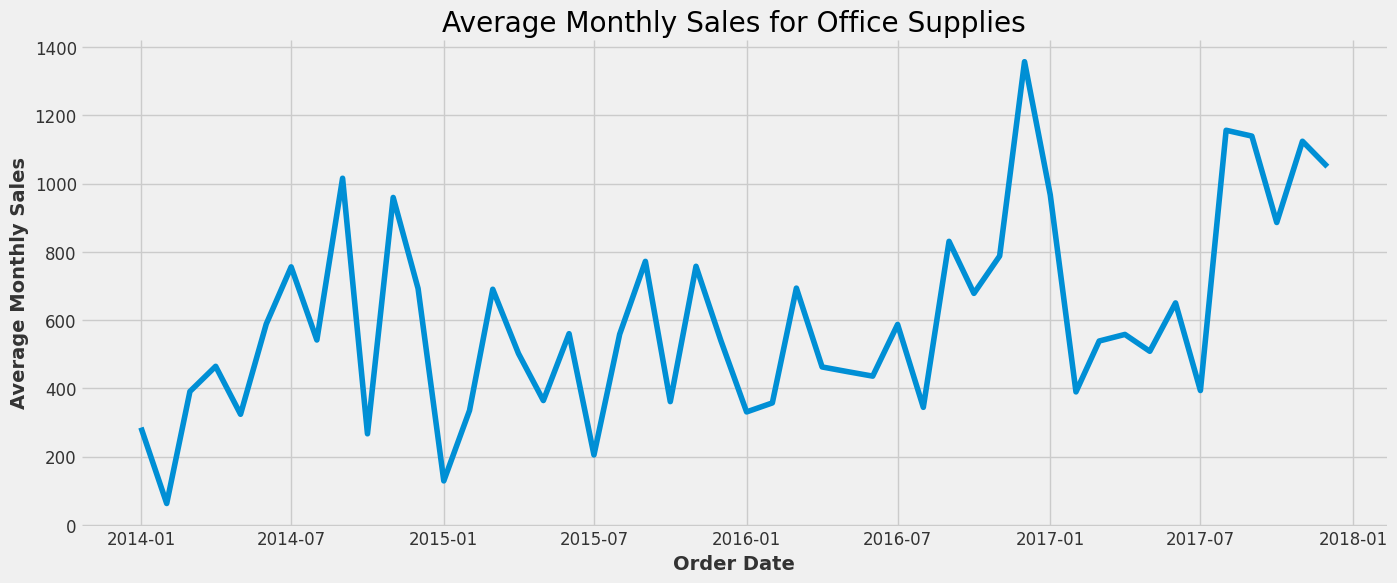

In [63]:
# :et's see average monthly sales

plt.figure(figsize=(15, 6))
plt.grid(True)

# Add title and axis names
plt.xlabel("Order Date")
plt.ylabel("Average Monthly Sales")
plt.title("Average Monthly Sales for Office Supplies")

# Plot the average monthly sales
plt.plot(monthly_mean_sales)
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are **always low at the beginning of the year and high at the end of the year**. There is always an upward trend within any single year with a couple of low months in the mid of the year.

In [64]:
# # Let's plot a line chart for year 2014 only

# plt.figure(figsize=(15, 6))
# plt.grid(True)

# # Add title and axis names
# plt.xlabel("Order Date")
# plt.ylabel("Average Monthly Sales")
# plt.title("Average Monthly Sales for Office Supplies")

# # Plot the average monthly sales
# plt.plot(monthly_mean_sales["2017"])
# plt.show()


We can also visualize our data using a method called `time-series decomposition` that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

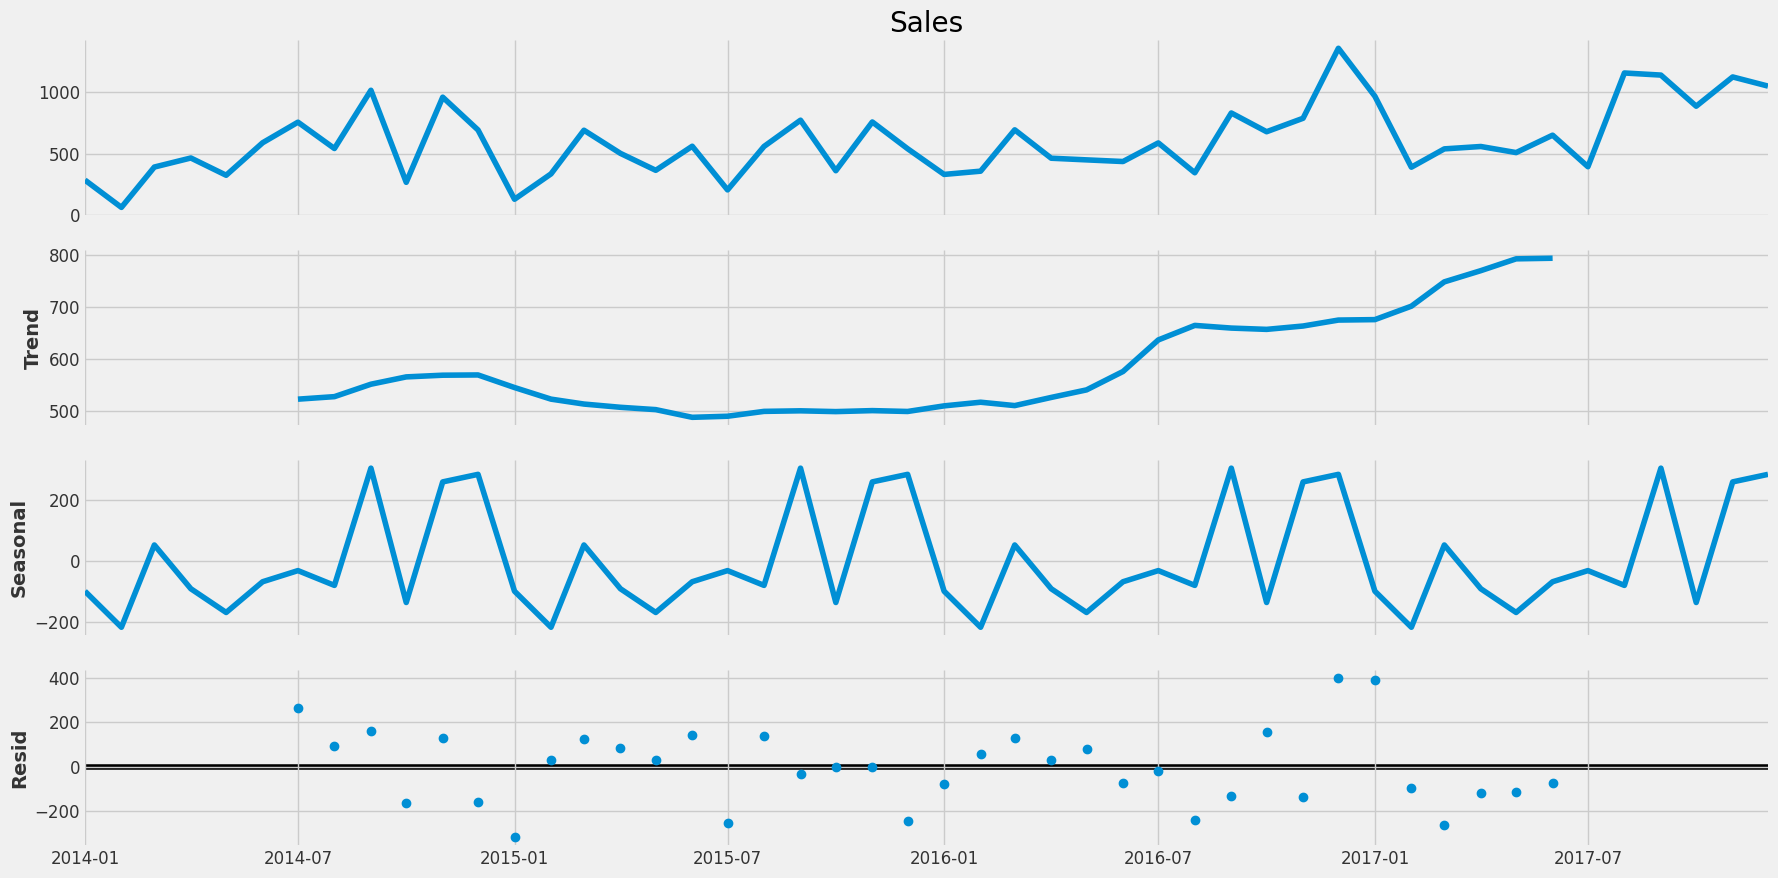

In [65]:
rcParams["figure.figsize"] = 18, 9

decomposition = sm.tsa.seasonal_decompose(monthly_mean_sales, model="additive")
fig = decomposition.plot()
plt.show()


The plot above clearly shows that the sales of office supply are unstable, along with its obvious seasonality.<br />
Though we have a slightly `Upward Trend`, shows that our data is not stationary.

#### Time series forecasting with ARIMA

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

An ARIMA model is characterized by 3 terms: p, d, q

where,
p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

`p` is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days. <br />
`d` is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small. <br />
`q` is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

In [66]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]

print("Examples of parameter combinations for Seasonal ARIMA...")
print("SARIMAX: {} x {}".format(pdq[1], seasonal_pdq[1]))
print("SARIMAX: {} x {}".format(pdq[1], seasonal_pdq[2]))
print("SARIMAX: {} x {}".format(pdq[2], seasonal_pdq[3]))
print("SARIMAX: {} x {}".format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [67]:
# warnings.filterwarnings("ignore")  # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                monthly_mean_sales,
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False,
            )

            results = mod.fit()

            print("ARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:747.1990404227043
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1769.6651979385492
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:500.73353987806166
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:333.71014965104285
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:516.0876543936834
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1698.0891184214613
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.44488563489716
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:335.90785733558124
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:702.6891395292458
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2666.4888322699426
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.7601415814748
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:319.8625957280591
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:517.495264658636
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2525.1057658142186
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:345.6922094460097
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:320.8450775248488
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:666.4572045007284
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1042.8626762982478
AR

- In SARIMA time series modeling, the `enforce_stationarity` parameter controls whether the model enforces stationarity on residuals.
- Stationarity implies that statistical properties like mean and variance don't change over time, but our data may not strictly adhere to this.
- By setting `enforce_stationarity=False`:
  - We allow the SARIMA model to handle stationarity of residuals based on the nature of our data.
  - This can be useful when our data is already stationary or when we want to handle stationarity separately.
- Note: If your data isn't stationary, ensure proper differencing and preprocessing for accurate modeling.




In [68]:
mod = sm.tsa.statespace.SARIMAX(
    monthly_mean_sales,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 0, 12),
    # enforce_stationarity=False,
    enforce_invertibility=False,
)
results = mod.fit()
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.1720,0.229,0.750,0.453,-0.278,0.622
ma.L1,-1.1313,0.243,-4.646,0.000,-1.608,-0.654
ar.S.L12,-0.5448,0.238,-2.292,0.022,-1.011,-0.079
sigma2,5.009e+04,2.52e+04,1.989,0.047,722.112,9.95e+04


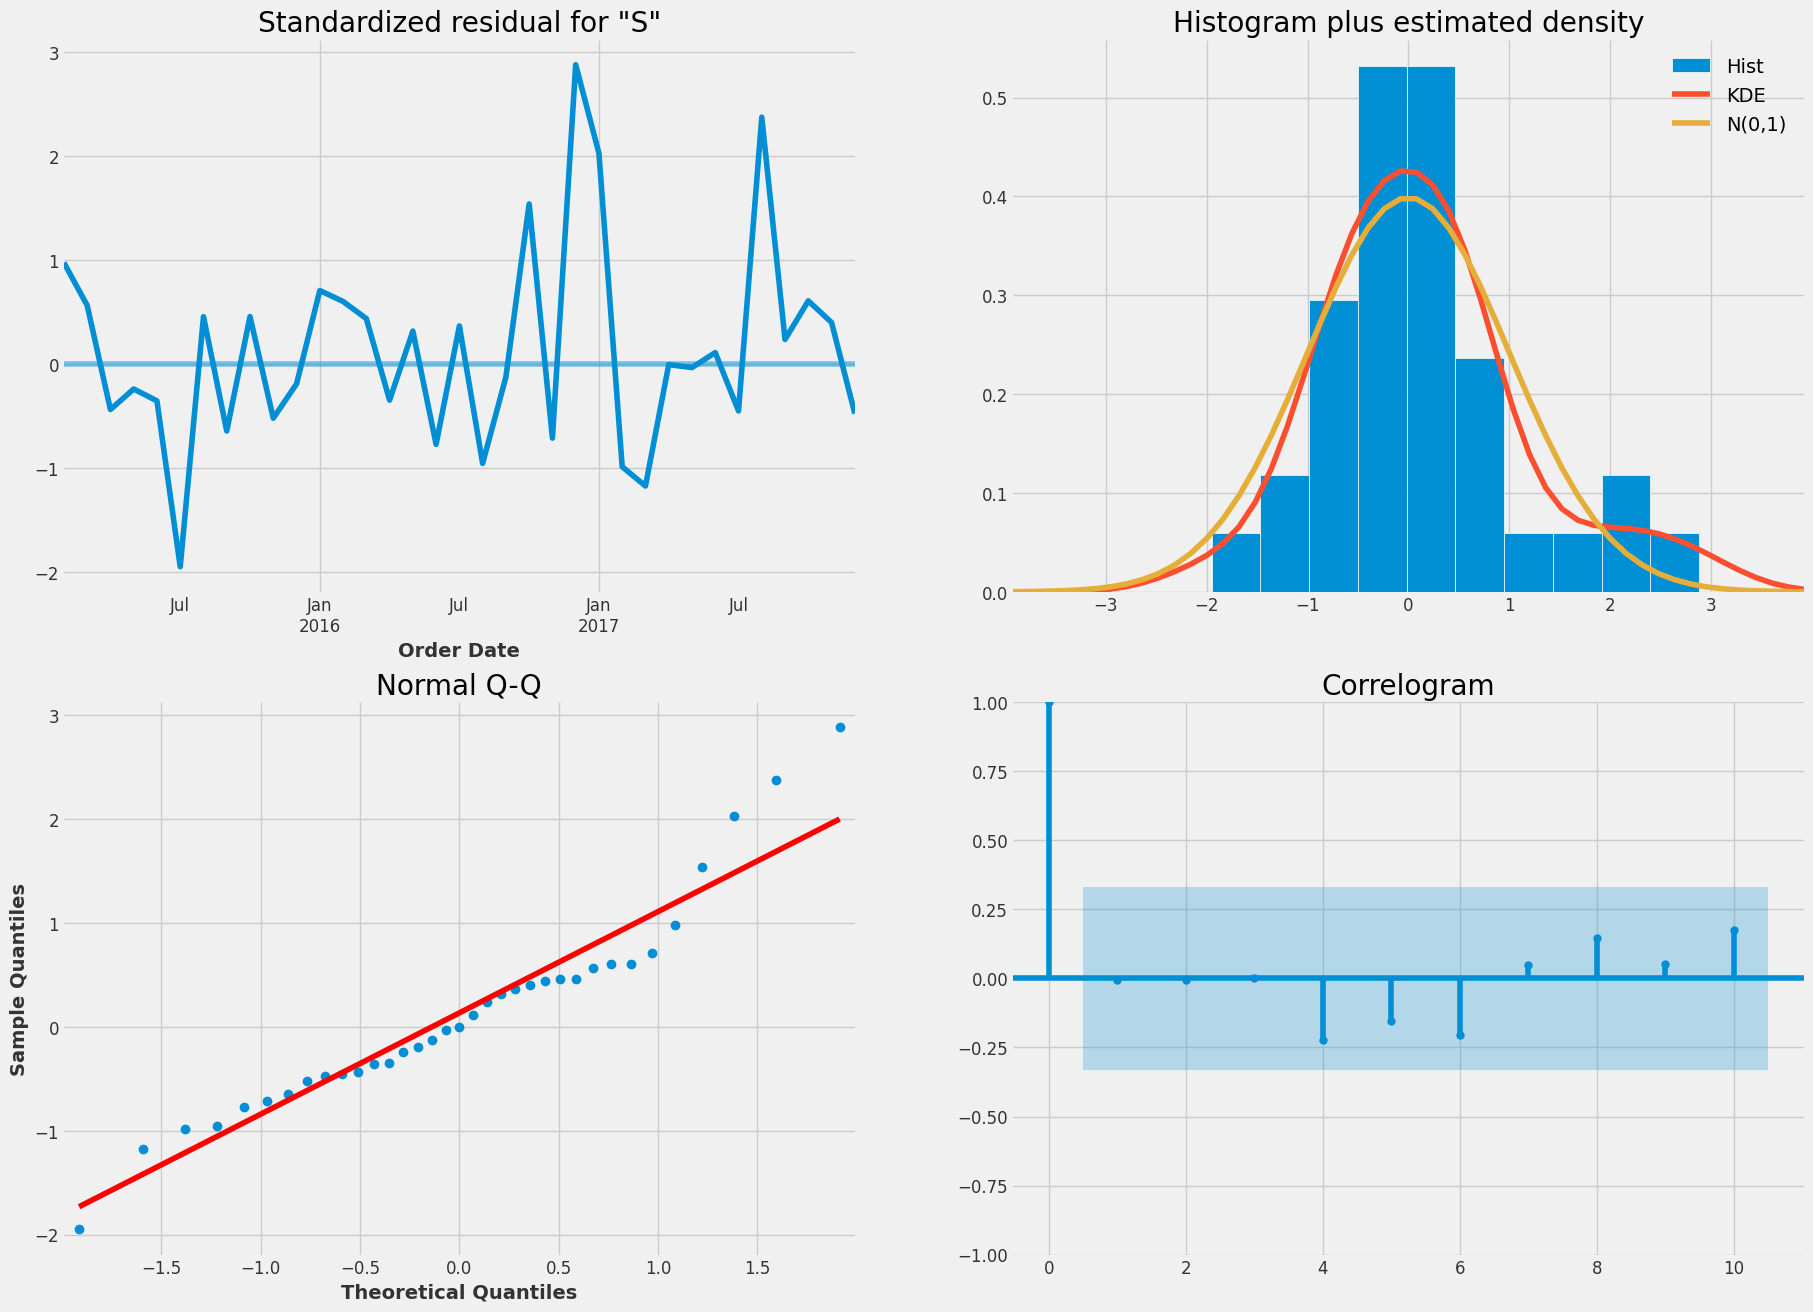

In [69]:
results.plot_diagnostics(figsize=(20, 15))
plt.show()


It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

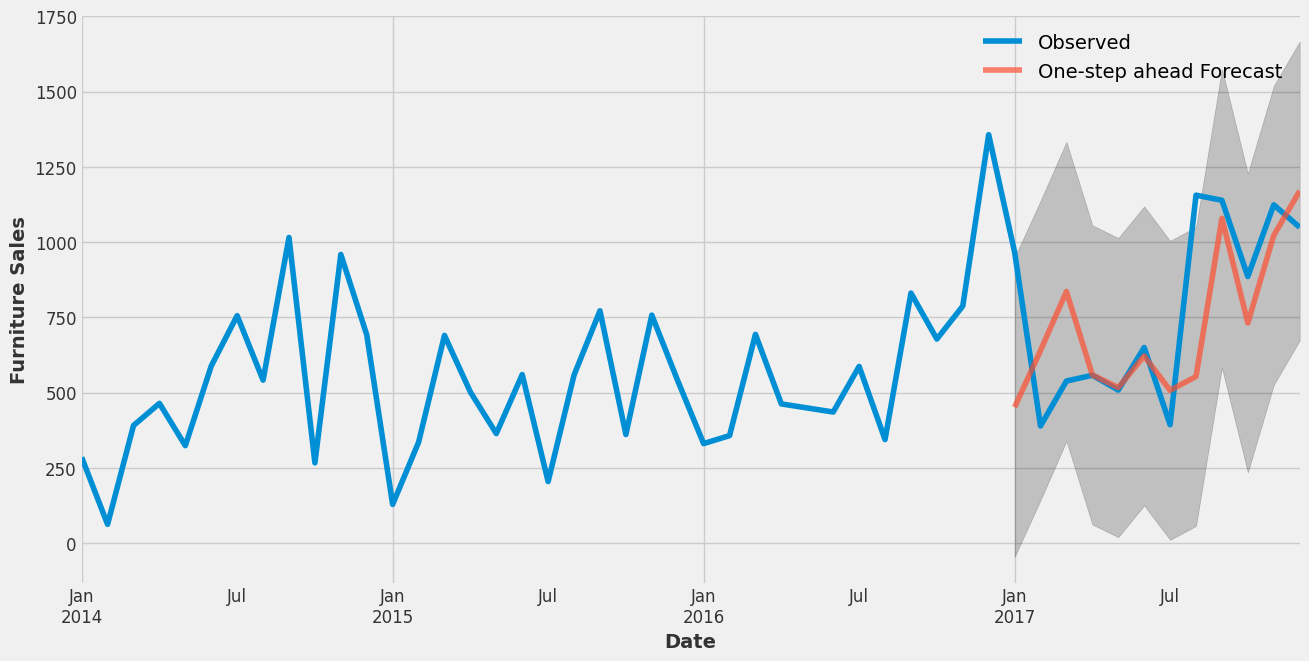

In [75]:
# Get predictions
start_date = pd.to_datetime('2017-01-01')
pred = results.get_prediction(start=start_date, dynamic=False)
pred_ci = pred.conf_int()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot observed data
observed_data = monthly_mean_sales['2014':]
observed_data.plot(label='Observed', ax=ax)

# Plot one-step ahead forecast
pred.predicted_mean.plot(label='One-step ahead Forecast', ax=ax, alpha=0.7)

# Fill between the confidence intervals
ax.fill_between(
    pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)

# Set labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

# Show the plot
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [77]:
monthly_mean_sales_forecasted = pred.predicted_mean
monthly_mean_sales_truth = monthly_mean_sales['2017-01-01':]
mse = ((monthly_mean_sales_forecasted - monthly_mean_sales_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 70427.02


In [78]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 265.38


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

Producing and visualizing forecasts

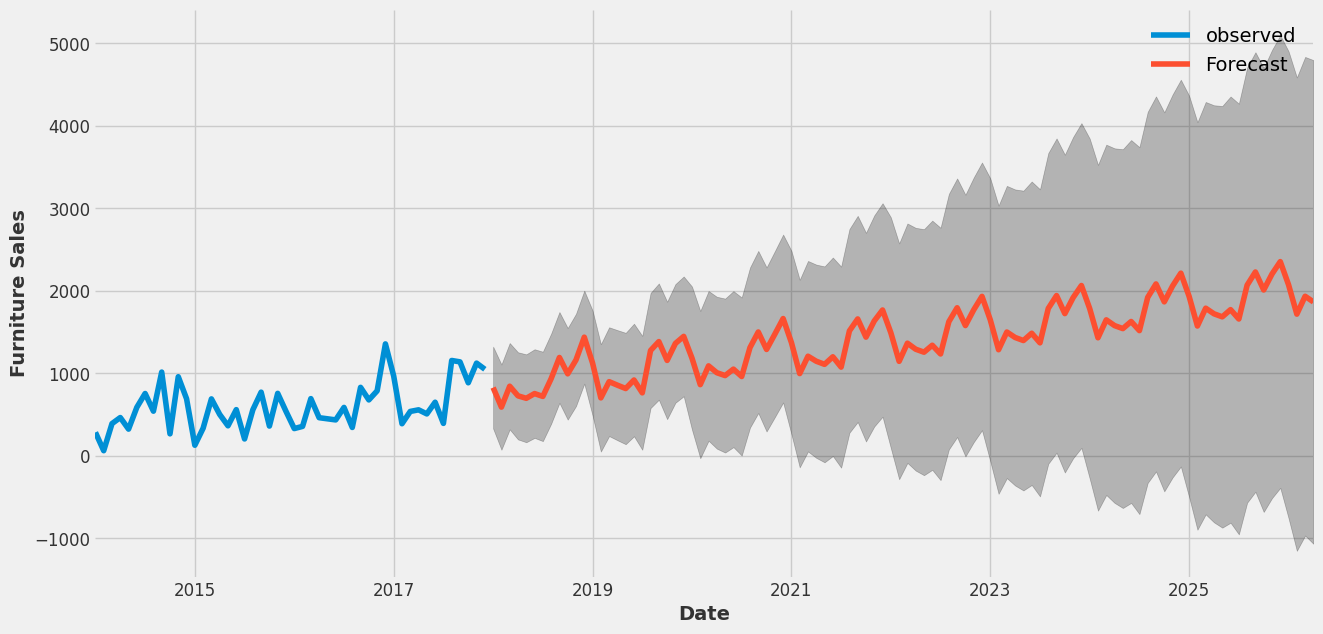

In [79]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = monthly_mean_sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

# Time Series of Furniture vs. Office Supplies
According to our data, there were way more number of sales from Office Supplies than from Furniture over the years.

In [81]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

#### Data Exploration
We are going to compare two categories’ sales in the same time period. This means combine two data frames into one and plot these two categories’ time series into one plot.

In [82]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


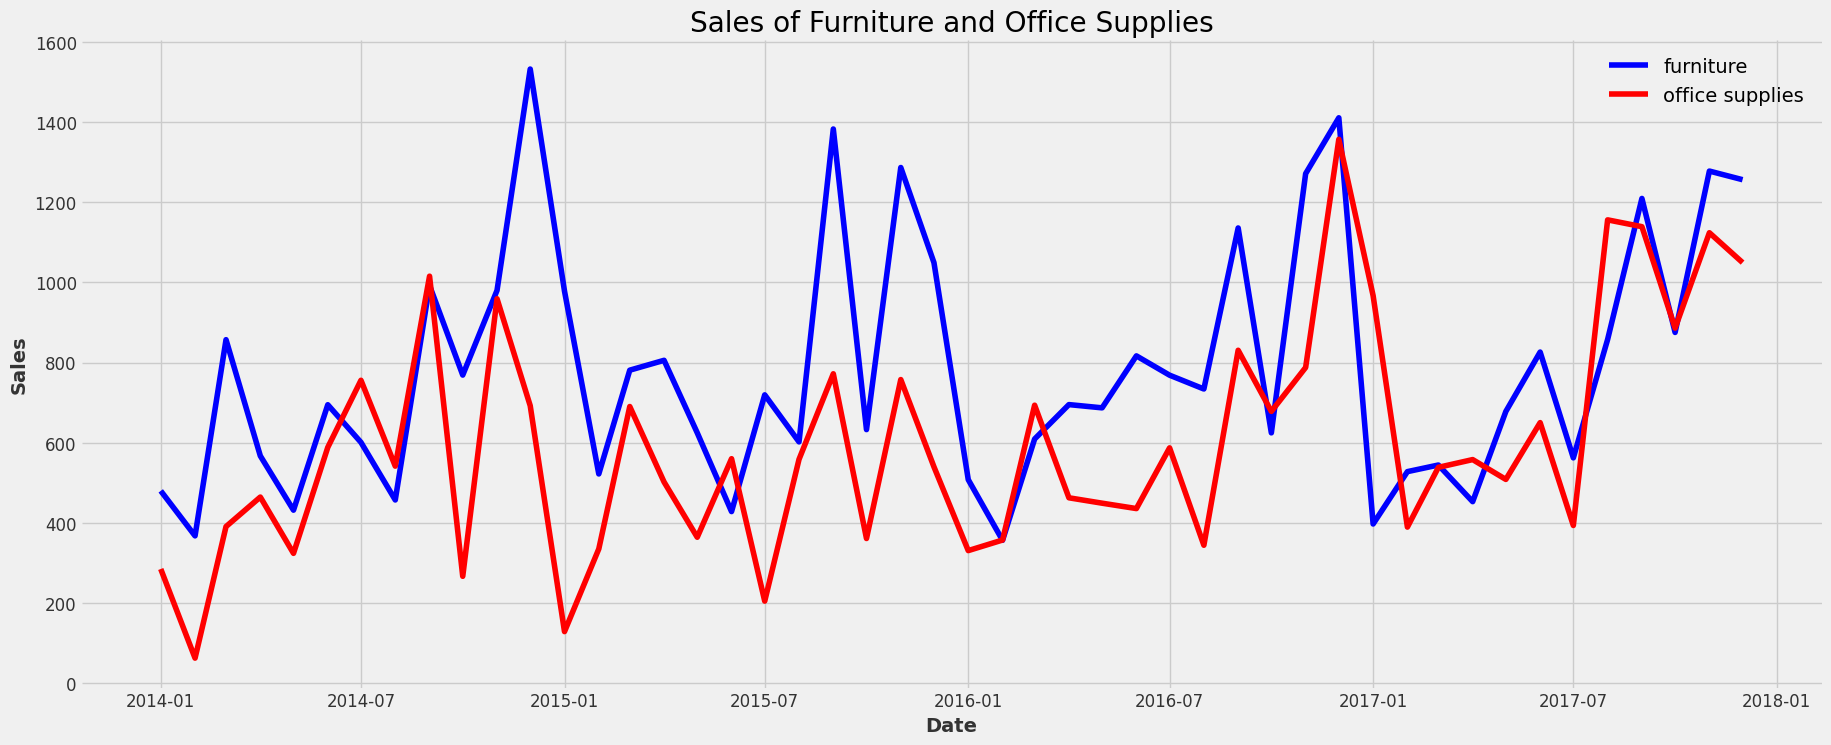

In [83]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

We observe that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occasionally, office supplies passed furniture on average daily sales. Let’s find out when was the first time office supplies’ sales surpassed those of furniture’s.

In [85]:
import numpy as np

# Assuming 'store' is your DataFrame
condition = store['office_sales'] > store['furniture_sales']

# Get the index of the first True condition
first_index = np.where(condition)[0][0]

# Access the 'Order Date' column using iloc
first_date = store.iloc[first_index]['Order Date']

print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))


Office supplies first time produced higher sales than furniture is 2014-07-01.


Office supplies first time produced higher sales than furniture is 2014–07–01.

Time Series Modeling with Prophet
Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

19:37:38 - cmdstanpy - INFO - Chain [1] start processing
19:37:40 - cmdstanpy - INFO - Chain [1] done processing
19:37:40 - cmdstanpy - INFO - Chain [1] start processing
19:37:41 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

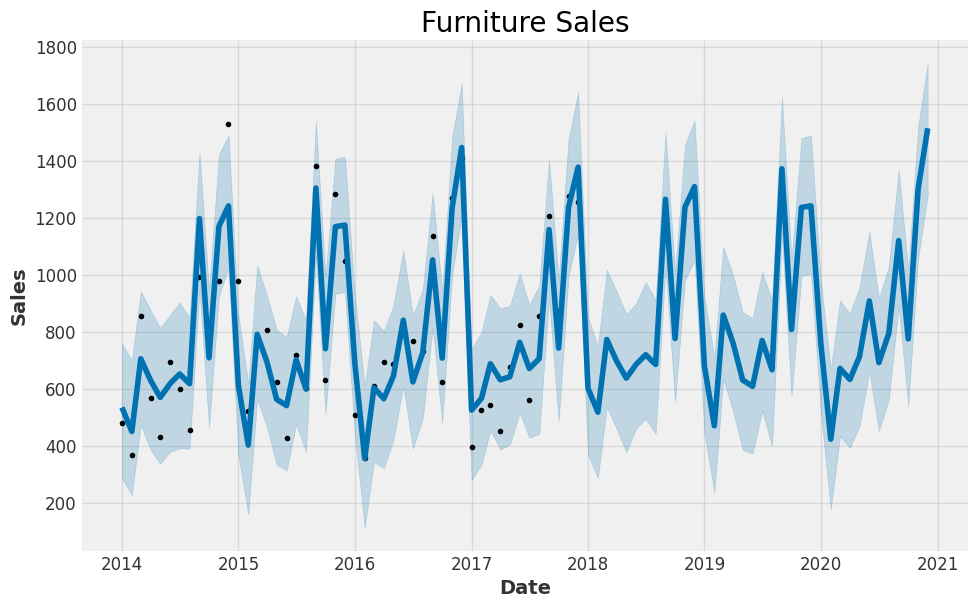

In [87]:
from prophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1800x600 with 0 Axes>

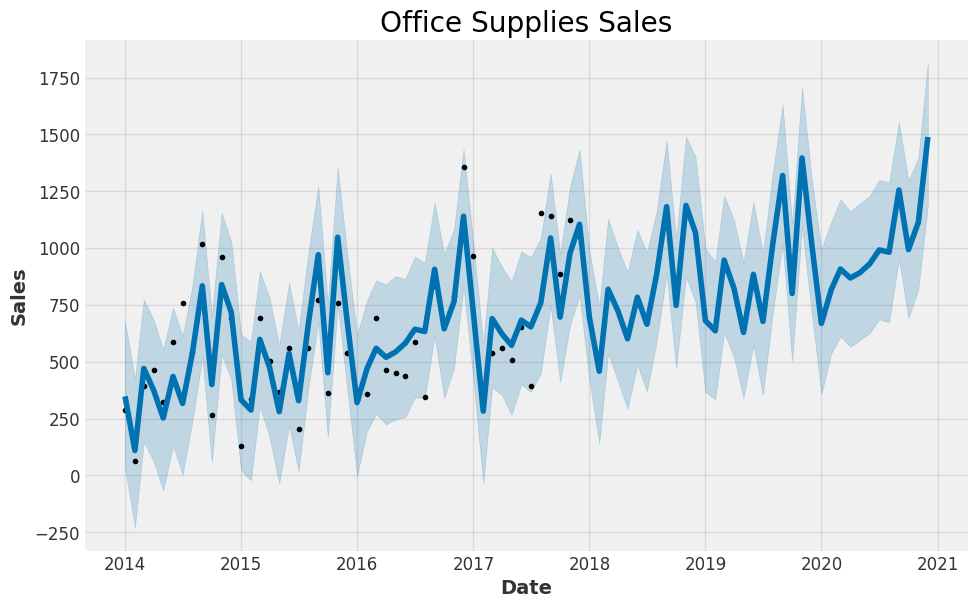

In [88]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

Compare Forecasts
We already have the forecasts for three years for these two categories into the future. We will now join them together to compare their future forecasts.

In [90]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.058109,287.678970,759.797100,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,...,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,727.494421,227.652836,701.438375,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,...,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,728.791734,474.286595,943.083867,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,...,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,730.228046,385.880961,876.341161,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,...,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,731.618025,338.247700,814.238757,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,...,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409


Trend and Forecast Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


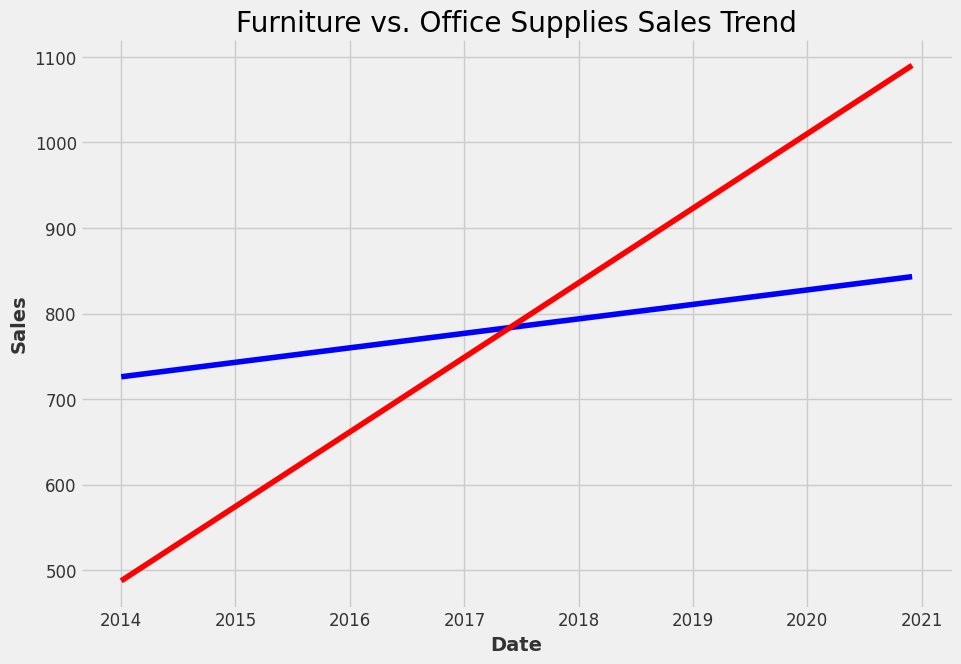

In [94]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


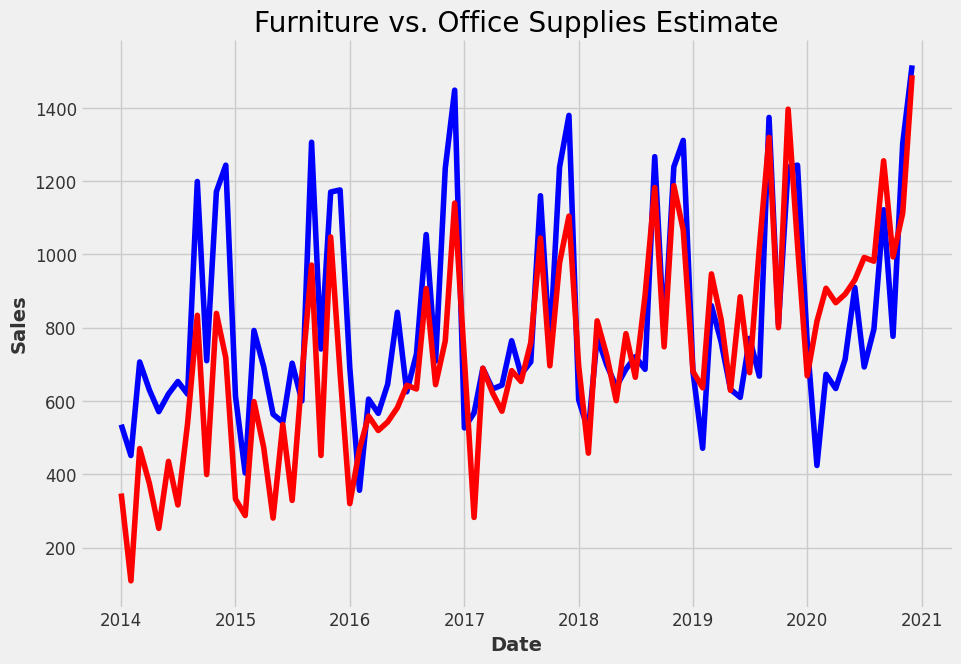

In [91]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

Trends and Patterns
Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

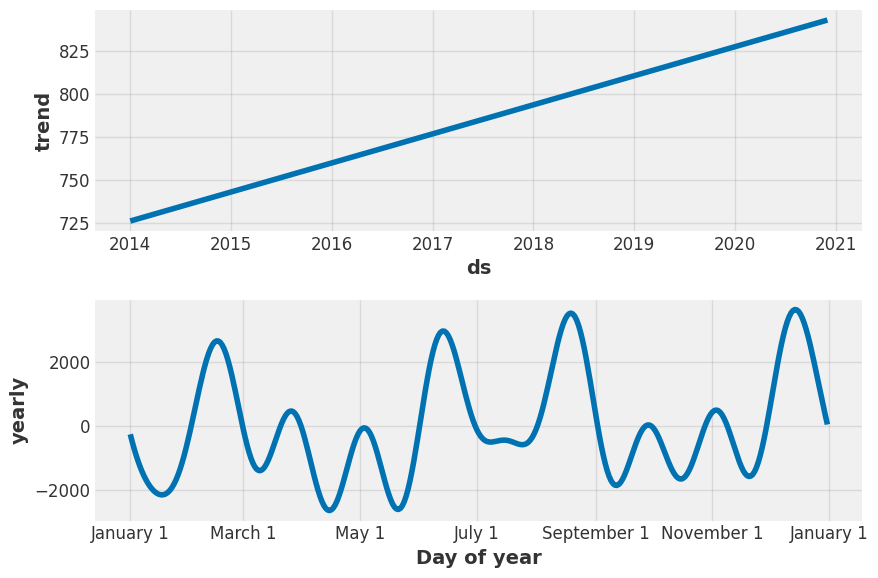

In [92]:
furniture_model.plot_components(furniture_forecast);

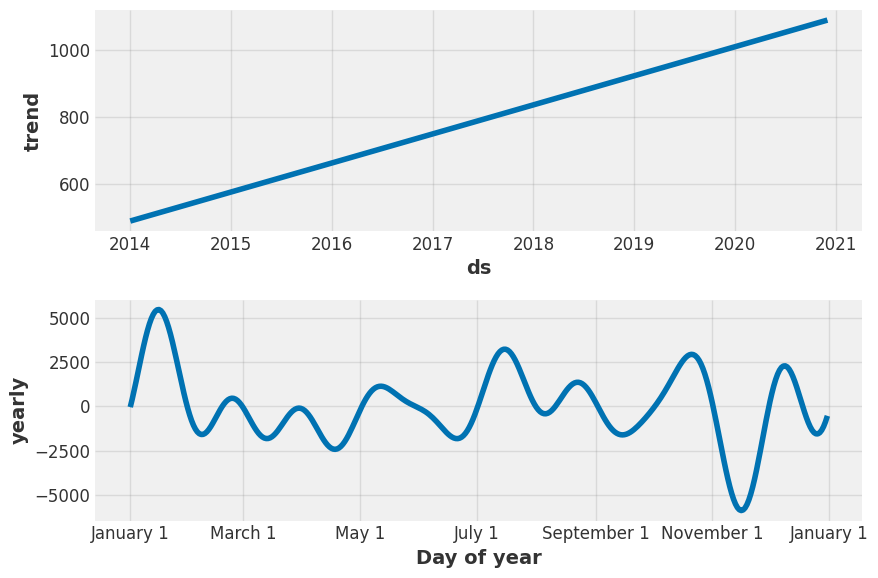

In [93]:
office_model.plot_components(office_forecast);

Good to see that the sales for both furniture and office supplies have been linearly increasing over time and will be keep growing, although office supplies’ growth seems slightly stronger.

The worst month for `furniture` is *April*, the worst month for `office supplies` is *February*. The best month for `furniture` is **December**, and the best month for `office supplies` is **October**.